In [35]:
import tensorflow as tf
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.0
Num GPUs Available:  1


In [36]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [68]:
# importamos el dataset KDDCup99.csv
df = pd.read_csv('KDDCup99.csv')
df.head()
# Creamos un sample de 2 millones de registros
df = df.sample(n=2000000, random_state=23)
# Guardamos el sample en un archivo csv
# df.to_csv('KDDCup99_2M.csv', index=False)
# df = pd.read_csv('KDDCup99_2M.csv')

In [38]:
columnas = df.columns
len(columnas)

42

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 2644013 to 2975297
Data columns (total 42 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   duration                     int64  
 1   protocol_type                object 
 2   service                      object 
 3   flag                         object 
 4   src_bytes                    int64  
 5   dst_bytes                    int64  
 6   land                         int64  
 7   wrong_fragment               int64  
 8   urgent                       int64  
 9   hot                          int64  
 10  num_failed_logins            int64  
 11  logged_in                    int64  
 12  num_compromised              int64  
 13  root_shell                   int64  
 14  su_attempted                 int64  
 15  num_root                     int64  
 16  num_file_creations           int64  
 17  num_shells                   int64  
 18  num_access_files             int64  
 19 

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,2000000.0,47.704859,714.307039,0.0,0.00,0.0,0.00,42908.0
src_bytes,2000000.0,1290.840856,495411.891658,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,2000000.0,654.980455,16715.788440,0.0,0.00,0.0,0.00,7068759.0
land,2000000.0,0.000005,0.002121,0.0,0.00,0.0,0.00,1.0
wrong_fragment,2000000.0,0.000642,0.042604,0.0,0.00,0.0,0.00,3.0
urgent,2000000.0,0.000006,0.004416,0.0,0.00,0.0,0.00,5.0
hot,2000000.0,0.012264,0.463143,0.0,0.00,0.0,0.00,44.0
num_failed_logins,2000000.0,0.000034,0.007681,0.0,0.00,0.0,0.00,4.0
logged_in,2000000.0,0.143727,0.350812,0.0,0.00,0.0,0.00,1.0
num_compromised,2000000.0,0.010930,5.640322,0.0,0.00,0.0,0.00,7479.0


In [41]:
def rhc(df):
    df_object = df.select_dtypes(include=['object']).copy()
    for col in df_object.columns:
        if col == 'Label':
            ltemp1 = df_object[col].tolist()
            ltemp1 = [el.split('\'')[1].split('.')[0] for el in ltemp1]
            df_object[col] = ltemp1
        else:
            ltemp = df_object[col].tolist()
            ltemp = [el.split('\'')[1] for el in ltemp]
            df_object[col] = ltemp
    # Reemplazamos los valores de las columnas de df
    df[df_object.columns] = df_object
    return df

In [42]:
rhc(df)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
2644013,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
3577309,0,tcp,private,S0,0,0,0,0,0,0,...,14,0.05,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune
1019956,0,tcp,http,SF,257,259,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.0,0.0,0.0,0.0,normal
2465271,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
983557,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377609,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
2848578,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf
4621860,0,tcp,private,REJ,0,0,0,0,0,0,...,15,0.06,0.08,0.00,0.00,0.0,0.0,1.0,1.0,neptune
1992914,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,smurf


In [43]:
# Número de etiquetas de ataque
df['Label'].value_counts()

Label
smurf              1146167
neptune             437723
normal              397325
satan                 6526
ipsweep               5138
portsweep             4231
nmap                  1011
back                   888
warezclient            417
teardrop               395
pod                    111
guess_passwd            24
buffer_overflow         10
warezmaster              6
imap                     6
ftp_write                5
land                     4
rootkit                  4
multihop                 4
loadmodule               3
perl                     2
Name: count, dtype: int64

In [44]:
def change_label(df):
  df1 = df.copy()
  df1.Label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df1.Label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df1.Label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df1.Label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
  return df1

In [45]:
df_common = change_label(df)
df_common['Label'].value_counts()

Label
Dos       1585288
normal     397325
Probe       16906
R2L           462
U2R            19
Name: count, dtype: int64

In [46]:
df['Label'].value_counts()

Label
smurf              1146167
neptune             437723
normal              397325
satan                 6526
ipsweep               5138
portsweep             4231
nmap                  1011
back                   888
warezclient            417
teardrop               395
pod                    111
guess_passwd            24
buffer_overflow         10
warezmaster              6
imap                     6
ftp_write                5
land                     4
rootkit                  4
multihop                 4
loadmodule               3
perl                     2
Name: count, dtype: int64

In [47]:
# Estandarizamos los datos numéricos
std_scaler = StandardScaler()
def standardization(df,col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
    return df

numeric_col = df_common.select_dtypes(include='number').columns
data = standardization(df_common,numeric_col)

In [48]:
Label = pd.DataFrame(data.Label)
le2 = preprocessing.LabelEncoder()
enc_label = Label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data

(2000000, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label,intrusion
2644013,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0
3577309,-0.066785,tcp,private,S0,-0.002606,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,-1.711604,0.269388,-1.257439,-0.156397,2.151969,2.150707,-0.250755,-0.249547,Dos,0
1019956,-0.066785,tcp,http,SF,-0.002087,-0.023689,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,-1.236651,0.566992,-0.466525,-0.465538,-0.250755,-0.249547,normal,4
2465271,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0
983557,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377609,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0
2848578,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0
4621860,-0.066785,tcp,private,REJ,-0.002606,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,-1.687284,0.453448,-1.257439,-0.156397,-0.466525,-0.465538,4.080658,4.080894,Dos,0
1992914,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,Dos,0


In [49]:
data.drop(labels= ['Label'], axis=1, inplace=True)
print(data.shape)
data

(2000000, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
2644013,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0
3577309,-0.066785,tcp,private,S0,-0.002606,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,-1.654453,-1.711604,0.269388,-1.257439,-0.156397,2.151969,2.150707,-0.250755,-0.249547,0
1019956,-0.066785,tcp,http,SF,-0.002087,-0.023689,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,-1.236651,0.566992,-0.466525,-0.465538,-0.250755,-0.249547,4
2465271,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0
983557,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377609,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0
2848578,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0
4621860,-0.066785,tcp,private,REJ,-0.002606,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,-1.645011,-1.687284,0.453448,-1.257439,-0.156397,-0.466525,-0.465538,4.080658,4.080894,0
1992914,-0.066785,icmp,ecr_i,SF,-0.000522,-0.039183,-0.002121,-0.015081,-0.001472,-0.02648,...,0.621026,0.598808,-0.282792,0.821384,-0.156397,-0.466525,-0.465538,-0.250755,-0.249547,0


In [50]:
# one-hot-encoding categorical columns
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
print(data.shape)

(2000000, 122)


In [51]:
data.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF', 'SH'],
      dtype='object', length=122)

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,2000000.0,1.538503e-17,1.00000,-0.066785,-0.066785,-0.066785,-0.066785,60.002637
src_bytes,2000000.0,-1.776357e-19,1.00000,-0.002606,-0.002515,-0.001556,-0.000522,1399.592005
dst_bytes,2000000.0,1.374900e-18,1.00000,-0.039183,-0.039183,-0.039183,-0.039183,422.840108
land,2000000.0,-1.955547e-18,1.00000,-0.002121,-0.002121,-0.002121,-0.002121,471.403460
wrong_fragment,2000000.0,-5.790923e-19,1.00000,-0.015081,-0.015081,-0.015081,-0.015081,70.401107
urgent,2000000.0,-7.369660e-19,1.00000,-0.001472,-0.001472,-0.001472,-0.001472,1132.276789
hot,2000000.0,7.243983e-18,1.00000,-0.026480,-0.026480,-0.026480,-0.026480,94.976541
num_failed_logins,2000000.0,-5.417888e-20,1.00000,-0.004426,-0.004426,-0.004426,-0.004426,520.756319
logged_in,2000000.0,3.042899e-17,1.00000,-0.409696,-0.409696,-0.409696,-0.409696,2.440832
num_compromised,2000000.0,1.432632e-18,1.00000,-0.001938,-0.001938,-0.001938,-0.001938,1325.986527


In [53]:
y_data= data['intrusion']
X_data= data.drop(labels=['intrusion'], axis=1)

In [54]:
# Realisamos lasso para eliminar las columnas que no aportan información
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Seleccionamos las columnas que aportan información
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=23, max_iter=5000))

feature_sel_model.fit(X_data, y_data)
feature_sel_model.get_support()

selected_feat = X_data.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_data.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('selected features names: {}'.format(selected_feat))

total features: 121
selected features: 21
selected features names: Index(['duration', 'wrong_fragment', 'hot', 'logged_in', 'count', 'srv_count',
       'srv_serror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'icmp', 'udp',
       'http', 'private'],
      dtype='object')


In [55]:
X_data = X_data[selected_feat]

In [56]:
from sklearn.preprocessing import LabelBinarizer
y_data = LabelBinarizer().fit_transform(y_data)

X_data=np.array(X_data)
y_data=np.array(y_data)

In [57]:
# Convertimos los valores true/false a 1/0
X_data = X_data.astype('float32')
y_data = y_data.astype('float32')
X_data

array([[-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         0.        ,  1.        ],
       [-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         0.        ,  1.        ],
       [-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         0.        ,  0.        ],
       [-0.06678483, -0.0150808 , -0.02647993, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [58]:
y_data

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [59]:
# Separamos en xtrain, ytrain y xtest, ytest del dataset 70% y 30% respectivamente
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.4, random_state=23)
print(X_train.shape,'\n',X_test.shape)

(1200000, 21) 
 (800000, 21)


In [60]:
# Hacemos un reshape
X_train = np.reshape(X_train, ( X_train.shape[0], 1 , X_train.shape[1] ))
X_test = np.reshape(X_test, ( X_test.shape[0], 1,  X_test.shape[1] ))

In [61]:
model = Sequential() # initializing model
model.add(LSTM(4,return_sequences=True,input_shape = (1, X_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(4,return_sequences=True))
model.add(Dropout(0.5))
# model.add(LSTM(5,return_sequences=True))
# model.add(Dropout(0.7))
model.add(Flatten())
# model.add(Dense(units=20))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))

In [62]:
# defining loss function, optimizer, metrics and then compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
# Resumen del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 4)              416       
                                                                 
 dropout_2 (Dropout)         (None, 1, 4)              0         
                                                                 
 lstm_3 (LSTM)               (None, 1, 4)              144       
                                                                 
 dropout_3 (Dropout)         (None, 1, 4)              0         
                                                                 
 flatten_1 (Flatten)         (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
Total params: 585
Trainable params: 585
Non-trainable 

In [64]:
# training the model on training dataset
history = model.fit(X_train, y_train, epochs=100, batch_size=5000, validation_data=(X_test, y_test))


Epoch 1/100
240/240 [==============================] - 4s 7ms/step - loss: 1.2900 - accuracy: 0.7723 - val_loss: 0.8147 - val_accuracy: 0.7927
Epoch 2/100
240/240 [==============================] - 1s 5ms/step - loss: 0.7191 - accuracy: 0.8044 - val_loss: 0.4005 - val_accuracy: 0.8195
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 0.4927 - accuracy: 0.8620 - val_loss: 0.2335 - val_accuracy: 0.9877
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3775 - accuracy: 0.8971 - val_loss: 0.1491 - val_accuracy: 0.9897
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 0.3049 - accuracy: 0.9185 - val_loss: 0.1019 - val_accuracy: 0.9906
Epoch 6/100
240/240 [==============================] - 1s 5ms/step - loss: 0.2608 - accuracy: 0.9248 - val_loss: 0.0762 - val_accuracy: 0.9907
Epoch 7/100
240/240 [==============================] - 1s 5ms/step - loss: 0.2328 - accuracy: 0.9272 - val_loss: 0.0619 - val_accuracy: 0.9907

In [65]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

25000/25000 [==============================] - 57s 2ms/step - loss: 0.0137 - accuracy: 0.9911
Test results - Loss: 0.01367357186973095 - Accuracy: 99.1121232509613%


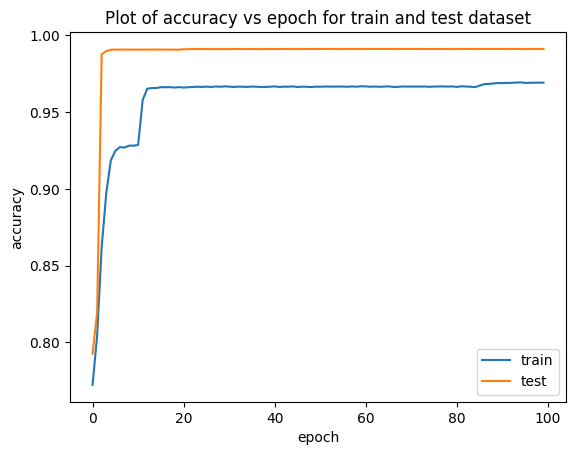

In [66]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.legend(['train','test'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

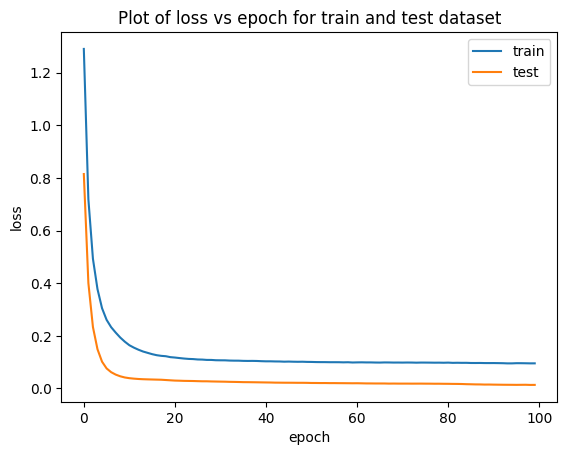

In [67]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()